In [41]:
import numpy as np
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
import calendar
from scipy.interpolate import interp1d

In [42]:
warnings.filterwarnings('ignore')

In [43]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Model\\Data')
data_all = pd.read_csv('Data_combined.csv', index_col = 0)

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\tsdm\\')
mandal_boundaries = gpd.read_file('Mandal_Boundary.shp')
mandal_boundaries = mandal_boundaries.reset_index()

In [44]:
data_all = data_all[(data_all['ModifiedDateTime'] >='2016-09-01') & (data_all['ModifiedDateTime'] <='2019-08-01')].sort_values(by='ModifiedDateTime')

In [45]:
data_all['ModifiedDateTime'] = pd.to_datetime(data_all['ModifiedDateTime'])
data_all = data_all.sort_values(by='ModifiedDateTime')
data = data_all[data_all['Month'].isin([3, 4, 5, 9, 10])]

In [46]:
data_all.columns

Index(['index', 'ModifiedDateTime', 'Fires', 'FRP', 'Mandal_Nam', 'Dist_Name',
       'geometry', 'Year', 'Month', 'Season', 'NO2', 'PM2.5', 'SSM_mean',
       'SSM_median', 'SSM_min', 'SSM_max', 'SSM_percentile_90', 'PRE_mean',
       'PRE_median', 'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum',
       'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
       'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90',
       'BA_mean', 'BA_median', 'BA_sum', 'Area_Crops', 'Crops_Prop',
       'Area_Trees', 'Trees_Prop', 'Area_Built_Area', 'Built_Area_Prop',
       'time_to_rur_median', 'PowP_score', 'Soil Type', 'Area', 'POP_mean',
       'POP_median', 'Harvested_CropA_Paddy', 'Harvested_CropA_Maize',
       'Harvested_CropA_Soybean', 'Harvested_CropA_Cotton',
       'Harvested_CropA_Chillies', 'Harvested_CropA_Turmeric',
       'SoilT_Chromic_Luvisols', 'SoilT_Chromic_Vertisols',
       'SoilT_Eutric_Nitosols', 'SoilT_Lithosols', 'SoilT_Pellic_luvisols',
 

In [47]:
data = data.sort_values(by='ModifiedDateTime')

In [48]:
units = ['Fires', 'FRP', 'SSM_mean', 'SSM_median', 'SSM_min',
       'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median', 'PRE_min',
       'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean', 'POP_median',
       'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
       'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90',
       'BA_mean', 'BA_median', 'BA_sum', 'Area_Crops', 'Crops_Prop',
       'Area_Trees', 'Trees_Prop', 'Area_Built_Area', 'Built_Area_Prop',
       'PowP_score', 'Soil Type', 'Area',
       'Harvested_CropA_Paddy', 'Harvested_CropA_Maize',
       'Harvested_CropA_Soybean', 'Harvested_CropA_Cotton',
       'Harvested_CropA_Chillies', 'Harvested_CropA_Turmeric', 'SoilT_Chromic_Luvisols',
       'SoilT_Chromic_Vertisols', 'SoilT_Eutric_Nitosols', 'SoilT_Lithosols',
       'SoilT_Pellic_luvisols', 'SoilT_Plinthic_Luvisols',
       'SoilT_Vertic_Cambisols']

for i in units:

    if data_all[i].isnull().sum()>0:
        print(i + ' has ' + str(data_all[i].isnull().sum()) + ' missing values.')

ST_mean has 344 missing values.
ST_median has 344 missing values.
ST_min has 344 missing values.
ST_max has 344 missing values.
ST_percentile_90 has 344 missing values.
Harvested_CropA_Paddy has 662 missing values.
Harvested_CropA_Maize has 662 missing values.
Harvested_CropA_Soybean has 662 missing values.
Harvested_CropA_Cotton has 662 missing values.
Harvested_CropA_Chillies has 662 missing values.
Harvested_CropA_Turmeric has 662 missing values.


In [49]:
del data_all['time_to_rur_median']

## Dropping all mandals of which no one data type is available

In [50]:

# #Note that we do not have crop type values for all mandals, they have zero's during non-season but for complete picture we remove these mandals completely
missing_mandal_crop_types = [13, 34, 37, 220, 265, 579, 584, 585, 586, 587, 588, 591] #Can be found in Date_pre_combiner.ipynb

# #No soil temperature for this mandal available
# #missing_mandal_ST = [79]

# #We also need to remove the non-seasonal mandals
data_all = data_all[~data_all['index'].isin(missing_mandal_crop_types)]
data = data[~data['index'].isin(missing_mandal_crop_types)]
# #data = data[~data['index'].isin(missing_mandal_ST)]

In [51]:
mandal_boundaries[mandal_boundaries['index'].isin(missing_mandal_crop_types)]

,index,Area,S_No,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,...,F_SC,P_ST,M_ST,F_ST,Shape_Leng,Shape_Area,Mandal_Nam,Dist_Name,N_Revenue,geometry
13,13,42.0,254.0,81040.0,335634.0,168831.0,166803.0,34494.0,17809.0,16685.0,...,18060.0,5275.0,2717.0,2560.0,0.367891,4177.055039,Alwal,Medchal_Malkajgiri,Malkajgiri,"POLYGON ((78.51263 17.54925, 78.51385 17.54926..."
34,34,18.0,255.0,12814.0,48835.0,24985.0,23850.0,6621.0,3498.0,3123.0,...,1291.0,1028.0,513.0,515.0,0.167967,1792.194923,Bachupally,Medchal_Malkajgiri,Malkajgiri,"POLYGON ((78.38043 17.55034, 78.38106 17.54972..."
37,37,21.0,256.0,61950.0,257826.0,132441.0,125387.0,31025.0,16155.0,14870.0,...,7770.0,6183.0,3198.0,2985.0,0.335478,2069.200449,Balanagar,Medchal_Malkajgiri,Malkajgiri,"POLYGON ((78.47810 17.49376, 78.47827 17.49368..."
220,220,35.0,140.0,62497.0,261185.0,131817.0,129368.0,26282.0,13523.0,12759.0,...,11743.0,4896.0,2500.0,2396.0,0.259139,3457.621830,Karimnagar,Karimnagar,Karimnagar,"POLYGON ((79.11322 18.45987, 79.11325 18.45986..."
265,265,38.0,261.0,77899.0,310170.0,159118.0,151053.0,36499.0,18887.0,17612.0,...,6407.0,6190.0,3213.0,2977.0,0.293196,3841.531027,Kukatpally,Medchal_Malkajgiri,Malkajgiri,"POLYGON ((78.41526 17.51411, 78.41565 17.51406..."
579,579,580.0,277.0,7109.0,24816.0,12248.0,12568.0,2433.0,1217.0,1216.0,...,1882.0,12313.0,6020.0,6293.0,1.048721,57825.928890,Wazeed,Mulugu,Mulug,"POLYGON ((80.49328 18.62950, 80.49613 18.62755..."
584,584,154.0,552.0,8867.0,32116.0,15967.0,16149.0,2664.0,1369.0,1295.0,...,4065.0,189.0,95.0,94.0,0.664340,9542.063243,Nadikuda,Warangal_Rural,Parkal,"POLYGON ((79.63082 18.27296, 79.63283 18.26942..."
585,585,237.0,265.0,5454.0,23194.0,11665.0,11529.0,2726.0,1383.0,1343.0,...,2193.0,1444.0,734.0,710.0,0.816527,9311.926734,Muduchinthalaphally,Medchal_Malkajgiri,Keesara,"POLYGON ((78.65615 17.57997, 78.65584 17.58089..."
586,586,179.0,485.0,4595.0,18852.0,9397.0,9455.0,1747.0,876.0,871.0,...,1697.0,158.0,77.0,81.0,0.665693,6722.976256,Narayanraopet,Siddipet,Siddipet,"POLYGON ((78.82700 18.17911, 78.82691 18.17917..."
587,587,244.0,373.0,3304.0,13452.0,6514.0,6938.0,1365.0,698.0,667.0,...,1127.0,778.0,371.0,407.0,0.843323,5931.838673,Mosra,Nizamabad,Bodhan,"POLYGON ((78.03813 18.52915, 78.03453 18.53086..."


# Test Run all values 

In [53]:
parameters = ['index', 'Mandal_Nam', 'Dist_Name', 'ModifiedDateTime', 'Year', 'Month', 'Fires', 'FRP',
       'Season', 'NO2', 'PM2.5', 'SSM_mean', 'SSM_median', 'SSM_min',
       'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median', 'PRE_min',
       'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean', 'POP_median',
       'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
       'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90',
       'BA_mean', 'BA_median', 'BA_sum', 'Area_Crops', 'Crops_Prop',
       'Area_Trees', 'Trees_Prop', 'Area_Built_Area', 'Built_Area_Prop',
       'PowP_score', 'Soil Type', 'Area',
       'Harvested_CropA_Paddy', 'Harvested_CropA_Maize',
       'Harvested_CropA_Soybean', 'Harvested_CropA_Cotton',
       'Harvested_CropA_Chillies', 'Harvested_CropA_Turmeric', 'SoilT_Chromic_Luvisols',
       'SoilT_Chromic_Vertisols', 'SoilT_Eutric_Nitosols', 'SoilT_Lithosols',
       'SoilT_Pellic_luvisols', 'SoilT_Plinthic_Luvisols',
       'SoilT_Vertic_Cambisols', 'geometry']

#First just drop all NaNs
data_final = data[parameters].dropna()
data_all_final = data_all[parameters].dropna()
len(data_final), len(data_all_final)

(8218, 20063)

In [34]:
data_final.sort_values(by='ModifiedDateTime')

,index,Mandal_Nam,Dist_Name,ModifiedDateTime,Year,Month,Fires,FRP,Season,NO2,...,Harvested_CropA_Chillies,Harvested_CropA_Turmeric,SoilT_Chromic_Luvisols,SoilT_Chromic_Vertisols,SoilT_Eutric_Nitosols,SoilT_Lithosols,SoilT_Pellic_luvisols,SoilT_Plinthic_Luvisols,SoilT_Vertic_Cambisols,geometry
24121,441,Ramagundam,Peddapalli,2016-09-01,2016,9,0.0,0.0,Kharif,239.173233,...,0.00,0.00,0,0,0,0,1,0,0,"POLYGON ((79.48978792700007 18.80648444100007,..."
23972,292,Makloor,Nizamabad,2016-09-01,2016,9,0.0,0.0,Kharif,124.015750,...,0.23,0.67,0,0,0,0,1,0,0,"POLYGON ((78.06391450200005 18.85206868700004,..."
23750,70,Bommalaramaram,Yadadri Bhuvanagiri,2016-09-01,2016,9,0.0,0.0,Kharif,163.385829,...,0.00,0.00,1,0,0,0,0,0,0,"POLYGON ((78.72606160500004 17.66764441100003,..."
23688,8,Akkannapet,Siddipet,2016-09-01,2016,9,0.0,0.0,Kharif,138.779531,...,0.00,0.00,1,0,0,0,0,0,0,"POLYGON ((79.17005624100005 18.10883156900007,..."
23694,14,Amangal,Rangareddy,2016-09-01,2016,9,0.0,0.0,Kharif,126.230316,...,0.07,0.00,1,0,0,0,0,0,0,"POLYGON ((78.53941645200007 16.92285500300005,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14136,520,Utnur,Adilabad,2019-05-01,2019,5,0.0,0.0,Rabi,329.527563,...,0.00,0.00,1,0,0,0,0,0,0,"POLYGON ((78.73794851400004 19.49935716900006,..."
14175,559,Zahirabad,Sangareddy,2019-05-01,2019,5,0.0,0.0,Rabi,265.748037,...,0.00,0.00,0,1,0,0,0,0,0,"POLYGON ((77.59613087600007 17.55150892200004,..."
14176,560,Lingal,Nagarkurnool,2019-05-01,2019,5,0.0,0.0,Rabi,283.464569,...,0.00,0.00,1,0,0,0,0,0,0,"POLYGON ((78.51020054100007 16.37550297600006,..."
14193,577,Mavala,Adilabad,2019-05-01,2019,5,0.0,0.0,Rabi,271.653549,...,0.00,0.00,0,1,0,0,0,0,0,"POLYGON ((78.51136180900005 19.68366125200004,..."


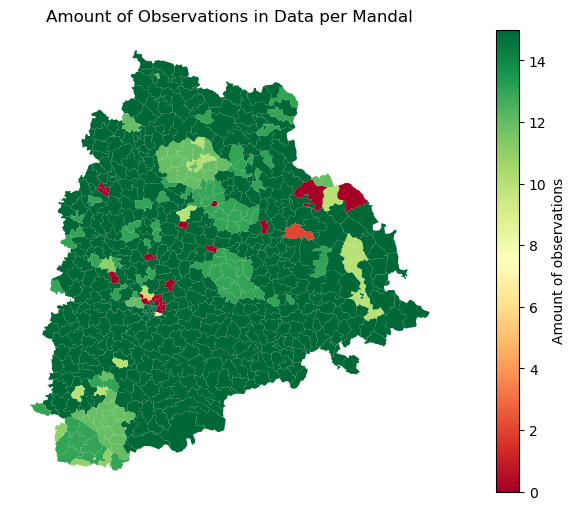

In [60]:
data_gr = data_final.groupby('index')['Year'].count().reset_index()
data_miss = pd.merge(data_gr, mandal_boundaries[['index', 'geometry']], on='index', how='right')
data_miss['Year'] = data_miss['Year'].fillna(0)

data_miss = gpd.GeoDataFrame(data_miss, geometry = data_miss.geometry, crs = {'init': 'epsg:4326'}) 

data_miss.plot(column = 'Year', legend=True, figsize = [12,6], legend_kwds = {'label': 'Amount of observations'}, cmap = 'RdYlGn')
plt.axis('off')
plt.title('Amount of Observations in Data per Mandal')
plt.show()

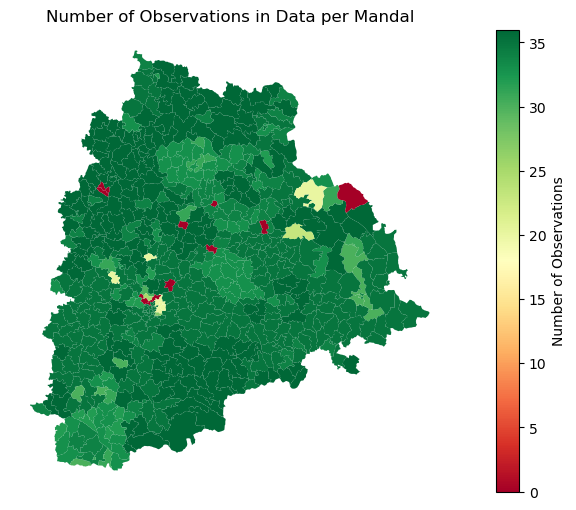

In [58]:
data_gr = data_all_final.groupby('index')['Year'].count().reset_index()
data_miss = pd.merge(data_gr, mandal_boundaries[['index', 'geometry']], on='index', how='right')
data_miss['Year'] = data_miss['Year'].fillna(0)

data_miss = gpd.GeoDataFrame(data_miss, geometry = data_miss.geometry, crs = {'init': 'epsg:4326'}) 

data_miss.plot(column = 'Year', legend=True, figsize = [12,6], legend_kwds = {'label': 'Number of Observations'}, cmap = 'RdYlGn')
plt.axis('off')
plt.title('Number of Observations in Data per Mandal')
plt.show()

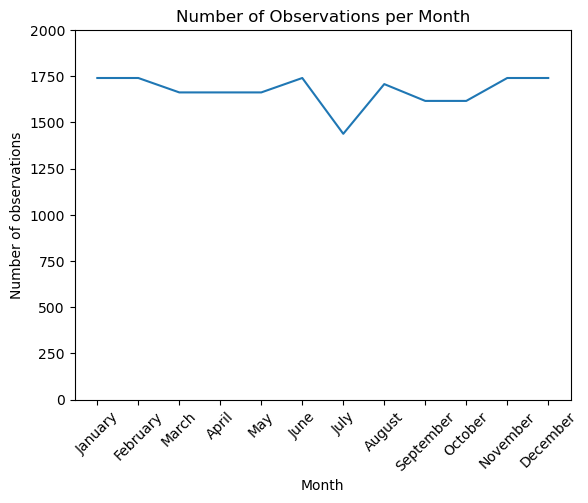

In [57]:
data_per_month = data_all_final.groupby('Month')['Year'].count().reset_index()

data_per_month['Month_text'] = 0
for i in range(0, len(data_per_month)):
    data_per_month['Month_text'].iloc[i] = calendar.month_name[data_per_month['Month'].iloc[i]]

plt.plot(data_per_month['Month_text'], data_per_month['Year'])
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylim([0, 2000])
plt.ylabel('Number of observations')
plt.title('Number of Observations per Month')
plt.show()

In [59]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Model\\Data')
print(len(data_all_final))
data_final.to_csv('Data_final.csv')
data_all_final.to_csv('Data_all_final.csv')

20063


In [44]:
data_all

,index,ModifiedDateTime,Fires,FRP,Mandal_Nam,Dist_Name,geometry,Year,Month,Season,...,Harvested_CropA_Cotton,Harvested_CropA_Chillies,Harvested_CropA_Turmeric,SoilT_Chromic_Luvisols,SoilT_Chromic_Vertisols,SoilT_Eutric_Nitosols,SoilT_Lithosols,SoilT_Pellic_luvisols,SoilT_Plinthic_Luvisols,SoilT_Vertic_Cambisols
24121,441,2016-09-01,0.0,0.0,Ramagundam,Peddapalli,"POLYGON ((79.48978792700007 18.80648444100007,...",2016,9,Kharif,...,9.80,0.00,0.0,0,0,0,0,1,0,0
23681,1,2016-09-01,0.0,0.0,Achampet,Nagarkurnool,"POLYGON ((78.91204436700008 16.54875844100007,...",2016,9,Kharif,...,68.56,0.00,0.0,0,0,0,1,0,0,0
23682,2,2016-09-01,0.0,0.0,Adavidevulapally,Nalgonda,"POLYGON ((79.52429751700004 16.72522135500003,...",2016,9,Kharif,...,49.78,10.31,0.0,0,0,0,0,1,0,0
23683,3,2016-09-01,0.0,0.0,Addagudur,Yadadri Bhuvanagiri,"POLYGON ((79.36516547400004 17.48429223000005,...",2016,9,Kharif,...,11.75,0.00,0.0,1,0,0,0,0,0,0
23684,4,2016-09-01,0.0,0.0,Addakal,Mahabubnagar,"POLYGON ((77.92377499000008 16.58074325200005,...",2016,9,Kharif,...,5.20,0.00,0.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,583,2019-08-01,0.0,0.0,Kotapalle,Mancherial,"POLYGON ((79.89595623700006 19.04002602700007,...",2019,8,None,...,0.00,0.00,0.0,0,0,0,0,1,0,0
23085,589,2019-08-01,0.0,0.0,Chowtakur,Sangareddy,"POLYGON ((78.06919574500017 17.67324188400011,...",2019,8,None,...,0.00,0.00,0.0,1,0,0,0,0,0,0
22793,297,2019-08-01,0.0,0.0,Mallapur,Jagtial,"POLYGON ((78.76733443200004 18.89785051400003,...",2019,8,None,...,0.00,0.00,0.0,0,0,0,0,1,0,0
23070,574,2019-08-01,0.0,0.0,Pitlam,Kamareddy,"POLYGON ((77.84079630600007 18.37232657200008,...",2019,8,None,...,0.00,0.00,0.0,0,0,0,0,0,0,1


In [42]:
data_final.columns

Index(['index', 'Mandal_Nam', 'Dist_Name', 'ModifiedDateTime', 'Year', 'Month',
       'Fires', 'FRP', 'Season', 'NO2', 'PM2.5', 'SSM_mean', 'SSM_median',
       'SSM_min', 'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median',
       'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean',
       'POP_median', 'ST_mean', 'ST_median', 'ST_min', 'ST_max',
       'ST_percentile_90', 'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max',
       'RWI_percentile_90', 'BA_mean', 'BA_median', 'BA_sum', 'Area_Crops',
       'Crops_Prop', 'Area_Trees', 'Trees_Prop', 'Area_Built_Area',
       'Built_Area_Prop', 'time_to_rur_median', 'PowP_score', 'Soil Type',
       'Area', 'Harvested_CropA_Paddy', 'Harvested_CropA_Maize',
       'Harvested_CropA_Soybean', 'Harvested_CropA_Cotton',
       'Harvested_CropA_Chillies', 'Harvested_CropA_Turmeric',
       'SoilT_Chromic_Luvisols', 'SoilT_Chromic_Vertisols',
       'SoilT_Eutric_Nitosols', 'SoilT_Lithosols', 'SoilT_Pellic_luvisols',
       'SoilT